<a href="https://colab.research.google.com/github/DIPANJAN001/TalkJulia_with_Randy/blob/main/compare7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
!pip install Boruta
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from boruta import BorutaPy
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import concatenate
from keras import Model
from keras.layers import Input
from keras.layers import Bidirectional
from keras import layers
from sklearn.metrics import mean_squared_error
from sklearn.datasets import make_classification
from sklearn.datasets import make_classification
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from keras.layers import LeakyReLU
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense
from keras.layers import BatchNormalization
from keras.models import load_model
from keras.layers import Input
from sklearn.decomposition import PCA 
from sklearn.metrics import mean_absolute_error

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 56 kB 2.6 MB/s 


In [2]:
df=pd.read_excel("/content/pv_01.xlsx")
weather_input1=df.drop('power_normed',axis=1)
weather_input=weather_input1.drop('time_idx',axis=1)
solpow=df['power_normed']

In [3]:
def lstm_data_transform(x_data, y_data, num_steps):
    """ Changes data to the format for LSTM training 
for sliding window approach """
    # Prepare the list for the transformed data
    X, y = list(), list()
    # Loop of the entire data set
    for i in range(x_data.shape[0]):
        # compute a new (sliding window) index
        end_ix = i + num_steps
        # if index is larger than the size of the dataset, we stop
        if end_ix >= x_data.shape[0]:
            break
        # Get a sequence of data for x
        seq_X = x_data[i:end_ix]
        # Get only the last element of the sequency for y
        seq_y = y_data[end_ix]
        # Append the list with sequencies
        X.append(seq_X)
        y.append(seq_y)
    # Make final arrays
    x_array = np.array(X)
    y_array = np.array(y)
    return x_array, y_array

In [4]:
from sklearn.datasets import make_classification
from sklearn.datasets import make_classification
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from keras.layers import LeakyReLU
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense
from keras.layers import BatchNormalization
from keras.models import load_model
from keras.layers import Input

In [5]:
n_inputs=weather_input.shape[1]

In [6]:
input_data_shape= Input(shape=(n_inputs,))
# encoder level 1
encoder= Dense(n_inputs*2)(input_data_shape)
encoder = BatchNormalization()(encoder)
encoder= LeakyReLU()(encoder)
# encoder level 2
encoder= Dense(n_inputs)(encoder)
encoder= BatchNormalization()(encoder)
encoder= LeakyReLU()(encoder)
# bottleneck
#n_bottleneck = round(float(n_inputs) / 2.0)
n_bottleneck = 20
bottleneck = Dense(n_bottleneck)(encoder)
# define decoder, level 1
decoder = Dense(n_inputs)(bottleneck)
decoder = BatchNormalization()(decoder)
decoder = LeakyReLU()(decoder)
# decoder level 2
decoder = Dense(n_inputs*2)(decoder)
decoder = BatchNormalization()(decoder)
decoder = LeakyReLU()(decoder)

In [7]:
output = Dense(n_inputs, activation='linear')(decoder)
# define autoencoder model
model = Model(inputs=input_data_shape, outputs=output)
# compile autoencoder model
model.compile(optimizer='adam', loss='mse')

In [8]:
 model.fit(weather_input,weather_input, epochs=100, batch_size=32, verbose=2)

Epoch 1/100
195/195 - 2s - loss: 0.0883 - 2s/epoch - 13ms/step
Epoch 2/100
195/195 - 1s - loss: 0.0179 - 707ms/epoch - 4ms/step
Epoch 3/100
195/195 - 1s - loss: 0.0144 - 655ms/epoch - 3ms/step
Epoch 4/100
195/195 - 1s - loss: 0.0127 - 630ms/epoch - 3ms/step
Epoch 5/100
195/195 - 1s - loss: 0.0115 - 617ms/epoch - 3ms/step
Epoch 6/100
195/195 - 1s - loss: 0.0110 - 610ms/epoch - 3ms/step
Epoch 7/100
195/195 - 1s - loss: 0.0101 - 645ms/epoch - 3ms/step
Epoch 8/100
195/195 - 1s - loss: 0.0096 - 738ms/epoch - 4ms/step
Epoch 9/100
195/195 - 1s - loss: 0.0090 - 629ms/epoch - 3ms/step
Epoch 10/100
195/195 - 1s - loss: 0.0086 - 640ms/epoch - 3ms/step
Epoch 11/100
195/195 - 1s - loss: 0.0086 - 722ms/epoch - 4ms/step
Epoch 12/100
195/195 - 1s - loss: 0.0082 - 710ms/epoch - 4ms/step
Epoch 13/100
195/195 - 1s - loss: 0.0080 - 740ms/epoch - 4ms/step
Epoch 14/100
195/195 - 1s - loss: 0.0079 - 665ms/epoch - 3ms/step
Epoch 15/100
195/195 - 1s - loss: 0.0076 - 766ms/epoch - 4ms/step
Epoch 16/100
195/195 

In [9]:
# define an encoder model (without the decoder)
encoder = Model(inputs=input_data_shape, outputs=bottleneck)
# save the encoder to file
encoder.save('encoder.h5')

In [10]:
#solpow=solpow.to_numpy().reshape(-1,1)
encoder = load_model('encoder.h5')

# encode the train data
X_train_encode = encoder.predict(weather_input)

195/195 [==============================] - 0s 2ms/step


In [11]:
encoder = load_model('encoder.h5')

# encode the train data
X_train_encode = encoder.predict(weather_input)

195/195 [==============================] - 0s 2ms/step


In [12]:
num_steps = 2
# training set
(x_transformed1,
 y_transformed1) = lstm_data_transform(X_train_encode,solpow , num_steps=num_steps)
assert x_transformed1.shape[0] == y_transformed1.shape[0]

In [13]:
X_train, X_test, y_train, y_test = train_test_split(x_transformed1, y_transformed1, test_size=0.4, random_state=42,shuffle=False)

In [14]:
inputs1=Input(shape=(X_train.shape[1],X_train.shape[2]))

In [15]:
from keras import optimizers
opt=optimizers.Adam(learning_rate=0.001)

Epoch 1/100
47/47 [==============================] - 16s 79ms/step - loss: 0.0257 - mse: 0.0257 - val_loss: 0.0049 - val_mse: 0.0049
Epoch 2/100
47/47 [==============================] - 2s 44ms/step - loss: 0.0106 - mse: 0.0106 - val_loss: 0.0045 - val_mse: 0.0045
Epoch 3/100
47/47 [==============================] - 2s 44ms/step - loss: 0.0075 - mse: 0.0075 - val_loss: 0.0035 - val_mse: 0.0035
Epoch 4/100
47/47 [==============================] - 2s 44ms/step - loss: 0.0066 - mse: 0.0066 - val_loss: 0.0031 - val_mse: 0.0031
Epoch 5/100
47/47 [==============================] - 2s 41ms/step - loss: 0.0064 - mse: 0.0064 - val_loss: 0.0031 - val_mse: 0.0031
Epoch 6/100
47/47 [==============================] - 2s 42ms/step - loss: 0.0060 - mse: 0.0060 - val_loss: 0.0041 - val_mse: 0.0041
Epoch 7/100
47/47 [==============================] - 2s 43ms/step - loss: 0.0058 - mse: 0.0058 - val_loss: 0.0032 - val_mse: 0.0032
Epoch 8/100
47/47 [==============================] - 2s 42ms/step - loss: 0

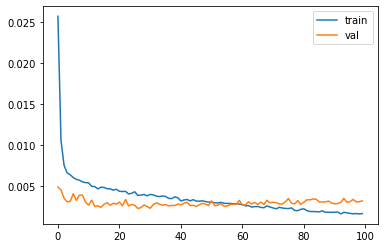

78/78 [==============================] - 2s 9ms/step


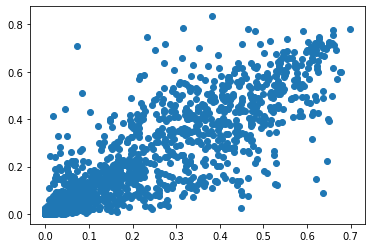

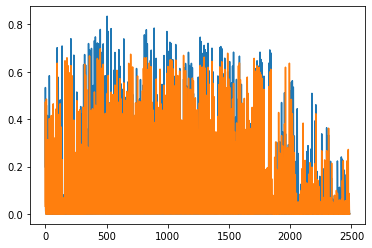

0.08430071270579681


In [16]:
def define_model():


  # firs
  fe1_0 = LSTM(208, activation='relu',return_sequences = True)(inputs1)
  fe1_1 = Dropout(0.5)(fe1_0)
  fe1_2 = LSTM(24, activation='relu',return_sequences = True)(fe1_1)
  fe1_3= Dropout(0.5)(fe1_2)
  fe1_4=LSTM(30, activation='relu')(fe1_3)
  out1_1=Dense(1, activation='relu')(fe1_4)



  fe2_0 = LSTM(208, activation='relu',return_sequences = True)(inputs1)
  fe2_1 = Dropout(0.5)(fe2_0)
  fe2_2 = LSTM(60, activation='relu',return_sequences = True)(fe2_1)
  fe2_3= Dropout(0.5)(fe2_2)
  fe2_4=LSTM(4, activation='relu')(fe2_3)
  out2_1=Dense(1, activation='relu')(fe2_4)

  fe3_0 =LSTM(104, activation='relu',return_sequences = True)(inputs1)
  fe3_1 = Dropout(0.6)(fe3_0)
  fe3_2 = LSTM(96, activation='relu',return_sequences = True)(fe3_1)
  fe3_3= Dropout(0.5)(fe3_2)
  fe3_4=LSTM(8, activation='relu')(fe3_3)#16
  out3_1=Dense(1, activation='relu')(fe3_4)
 
 

  output = layers.average([ out1_1, out2_1, out3_1])
  #merged3 = concatenate([out1_1,out2_1,out3_1], name='concat3')
  #output = Dense(1, activation='relu')( merged3)
  

  model = Model(inputs=[inputs1], outputs=[output])
  model.compile(optimizer=opt,loss='mean_squared_error',metrics=['mse'])
 
  return model
mdl=define_model()
history=mdl.fit(X_train, y_train, epochs = 100,validation_split=0.2,batch_size =64 )
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.legend()
plt.show()
y=mdl.predict(X_test)
plt.scatter(y,y_test)
plt.show()
df = pd.DataFrame()
df['time']=[i for i in range(len(y))]
df['Actual']=y_test
df['Predicted']=y
plt.plot(df['time'],df['Actual'])
plt.plot(df['time'],df['Predicted'])
plt.show()
print(np.sqrt(mean_squared_error(y,y_test)))
print(mean_absolute_error(y, y_test))

Epoch 1/200
47/47 [==============================] - 15s 73ms/step - loss: 0.0158 - mse: 0.0158 - val_loss: 0.0038 - val_mse: 0.0038
Epoch 2/200
47/47 [==============================] - 2s 42ms/step - loss: 0.0074 - mse: 0.0074 - val_loss: 0.0035 - val_mse: 0.0035
Epoch 3/200
47/47 [==============================] - 2s 42ms/step - loss: 0.0065 - mse: 0.0065 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 4/200
47/47 [==============================] - 2s 42ms/step - loss: 0.0060 - mse: 0.0060 - val_loss: 0.0035 - val_mse: 0.0035
Epoch 5/200
47/47 [==============================] - 2s 43ms/step - loss: 0.0056 - mse: 0.0056 - val_loss: 0.0031 - val_mse: 0.0031
Epoch 6/200
47/47 [==============================] - 2s 42ms/step - loss: 0.0051 - mse: 0.0051 - val_loss: 0.0030 - val_mse: 0.0030
Epoch 7/200
47/47 [==============================] - 2s 41ms/step - loss: 0.0055 - mse: 0.0055 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 8/200
47/47 [==============================] - 2s 42ms/step - loss: 0

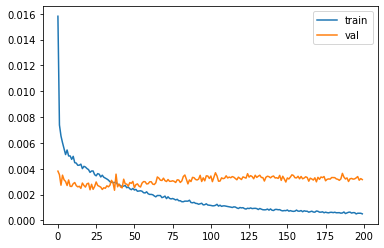

78/78 [==============================] - 3s 8ms/step


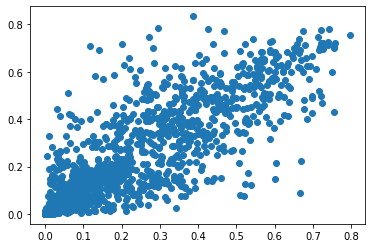

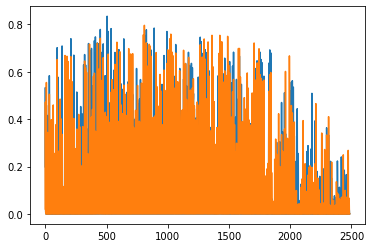

0.0895691228816674
0.04434408678999832


In [17]:
def define_model():


  # firs
  fe1_0 = LSTM(208, activation='relu',return_sequences = True)(inputs1)
  fe1_1 = Dropout(0.5)(fe1_0)
  fe1_2 = LSTM(24, activation='relu',return_sequences = True)(fe1_1)
  fe1_3= Dropout(0.2)(fe1_2)
  fe1_4=LSTM(30, activation='relu')(fe1_3)
  out1_1=Dense(1, activation='relu')(fe1_4)



  fe2_0 = LSTM(208, activation='relu',return_sequences = True)(inputs1)
  fe2_1 = Dropout(0.6)(fe2_0)
  fe2_2 = LSTM(60, activation='relu',return_sequences = True)(fe2_1)
  fe2_3= Dropout(0.5)(fe2_2)
  fe2_4=LSTM(4, activation='relu')(fe2_3)
  out2_1=Dense(1, activation='relu')(fe2_4)

  fe3_0 =LSTM(104, activation='relu',return_sequences = True)(inputs1)
  fe3_1 = Dropout(0.6)(fe3_0)
  fe3_2 = LSTM(96, activation='relu',return_sequences = True)(fe3_1)
  fe3_3= Dropout(0.5)(fe3_2)
  fe3_4=LSTM(8, activation='relu')(fe3_3)#16
  out3_1=Dense(1, activation='relu')(fe3_4)
 
 

  output = layers.average([ out1_1, out2_1, out3_1])
  #merged3 = concatenate([out1_1,out2_1,out3_1], name='concat3')
  #output = Dense(1, activation='relu')( merged3)
  

  model = Model(inputs=[inputs1], outputs=[output])
  model.compile(optimizer=opt,loss='mean_squared_error',metrics=['mse'])
 
  return model
mdl=define_model()
history=mdl.fit(X_train, y_train, epochs = 200,validation_split=0.2,batch_size =64)
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.legend()
plt.show()
y=mdl.predict(X_test)
plt.scatter(y,y_test)
plt.show()
df = pd.DataFrame()
df['time']=[i for i in range(len(y))]
df['Actual']=y_test
df['Predicted']=y
plt.plot(df['time'],df['Actual'])
plt.plot(df['time'],df['Predicted'])
plt.show()
print(np.sqrt(mean_squared_error(y,y_test)))
print(mean_absolute_error(y, y_test))

In [18]:
from keras.layers import Bidirectional


Epoch 1/100
47/47 [==============================] - 31s 156ms/step - loss: 0.0127 - mse: 0.0127 - val_loss: 0.0037 - val_mse: 0.0037
Epoch 2/100
47/47 [==============================] - 4s 91ms/step - loss: 0.0060 - mse: 0.0060 - val_loss: 0.0026 - val_mse: 0.0026
Epoch 3/100
47/47 [==============================] - 4s 88ms/step - loss: 0.0057 - mse: 0.0057 - val_loss: 0.0029 - val_mse: 0.0029
Epoch 4/100
47/47 [==============================] - 4s 91ms/step - loss: 0.0050 - mse: 0.0050 - val_loss: 0.0031 - val_mse: 0.0031
Epoch 5/100
47/47 [==============================] - 4s 88ms/step - loss: 0.0049 - mse: 0.0049 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 6/100
47/47 [==============================] - 4s 89ms/step - loss: 0.0048 - mse: 0.0048 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 7/100
47/47 [==============================] - 4s 88ms/step - loss: 0.0045 - mse: 0.0045 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 8/100
47/47 [==============================] - 4s 89ms/step - loss: 

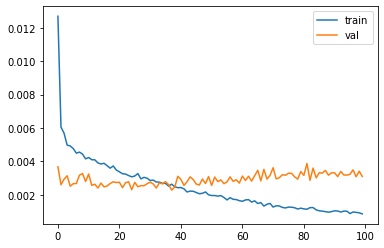

78/78 [==============================] - 4s 19ms/step


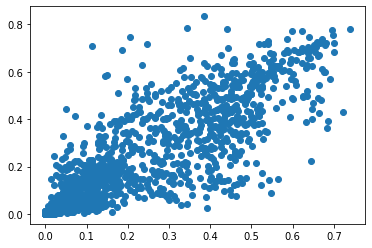

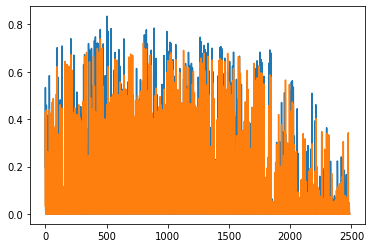

0.08579164221996127
0.042937177045459796


In [19]:
def define_model():


  # firs
  fe1_0 = Bidirectional(LSTM(208, activation='relu',return_sequences = True))(inputs1)
  fe1_1 = Dropout(0.5)(fe1_0)
  fe1_2 = Bidirectional(LSTM(24, activation='relu',return_sequences = True))(fe1_1)
  fe1_3= Dropout(0.2)(fe1_2)
  fe1_4=Bidirectional(LSTM(30, activation='relu'))(fe1_3)
  out1_1=Dense(1, activation='relu')(fe1_4)



  fe2_0 = Bidirectional(LSTM(208, activation='relu',return_sequences = True))(inputs1)
  fe2_1 = Dropout(0.6)(fe2_0)
  fe2_2 = Bidirectional(LSTM(60, activation='relu',return_sequences = True))(fe2_1)
  fe2_3= Dropout(0.5)(fe2_2)
  fe2_4=Bidirectional(LSTM(4, activation='relu'))(fe2_3)
  out2_1=Dense(1, activation='relu')(fe2_4)

  fe3_0 =Bidirectional(LSTM(104, activation='relu',return_sequences = True))(inputs1)
  fe3_1 = Dropout(0.6)(fe3_0)
  fe3_2 = Bidirectional(LSTM(96, activation='relu',return_sequences = True))(fe3_1)
  fe3_3= Dropout(0.5)(fe3_2)
  fe3_4=Bidirectional(LSTM(8, activation='relu'))(fe3_3)#16
  out3_1=Dense(1, activation='relu')(fe3_4)
 
 

  output = layers.average([ out1_1, out2_1, out3_1])
  #merged3 = concatenate([out1_1,out2_1,out3_1], name='concat3')
  #output = Dense(1, activation='relu')( merged3)
  

  model = Model(inputs=[inputs1], outputs=[output])
  model.compile(optimizer=opt,loss='mean_squared_error',metrics=['mse'])
 
  return model
mdl=define_model()
history=mdl.fit(X_train, y_train, epochs =100,validation_split=0.2,batch_size =64)
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.legend()
plt.show()
y=mdl.predict(X_test)
plt.scatter(y,y_test)
plt.show()
df = pd.DataFrame()
df['time']=[i for i in range(len(y))]
df['Actual']=y_test
df['Predicted']=y
plt.plot(df['time'],df['Actual'])
plt.plot(df['time'],df['Predicted'])
plt.show()
print(np.sqrt(mean_squared_error(y,y_test)))
print(mean_absolute_error(y, y_test))

Epoch 1/100
47/47 [==============================] - 35s 158ms/step - loss: 0.0111 - mse: 0.0111 - val_loss: 0.0039 - val_mse: 0.0039
Epoch 2/100
47/47 [==============================] - 4s 90ms/step - loss: 0.0059 - mse: 0.0059 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 3/100
47/47 [==============================] - 4s 89ms/step - loss: 0.0053 - mse: 0.0053 - val_loss: 0.0029 - val_mse: 0.0029
Epoch 4/100
47/47 [==============================] - 4s 90ms/step - loss: 0.0052 - mse: 0.0052 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 5/100
47/47 [==============================] - 5s 112ms/step - loss: 0.0048 - mse: 0.0048 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 6/100
47/47 [==============================] - 4s 88ms/step - loss: 0.0053 - mse: 0.0053 - val_loss: 0.0035 - val_mse: 0.0035
Epoch 7/100
47/47 [==============================] - 4s 89ms/step - loss: 0.0045 - mse: 0.0045 - val_loss: 0.0034 - val_mse: 0.0034
Epoch 8/100
47/47 [==============================] - 4s 88ms/step - loss:

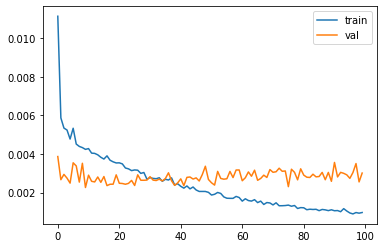

78/78 [==============================] - 4s 16ms/step


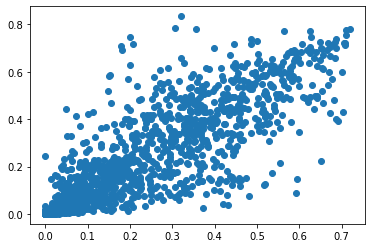

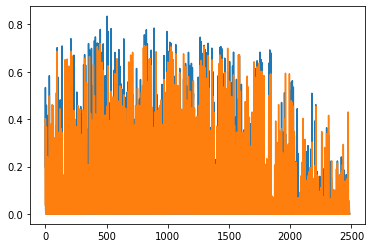

0.08664220742759413
0.04310994544401444


In [20]:
def define_model():


  # firs
  fe1_0 = Bidirectional(LSTM(208, activation='relu',return_sequences = True))(inputs1)
  fe1_1 = Dropout(0.5)(fe1_0)
  fe1_2 = Bidirectional(LSTM(24, activation='relu',return_sequences = True))(fe1_1)
  fe1_3= Dropout(0.2)(fe1_2)
  fe1_4=Bidirectional(LSTM(30, activation='relu'))(fe1_3)
  out1_1=Dense(1, activation='relu')(fe1_4)



  fe2_0 = Bidirectional(LSTM(208, activation='relu',return_sequences = True))(inputs1)
  fe2_1 = Dropout(0.6)(fe2_0)
  fe2_2 = Bidirectional(LSTM(60, activation='relu',return_sequences = True))(fe2_1)
  fe2_3= Dropout(0.5)(fe2_2)
  fe2_4=Bidirectional(LSTM(4, activation='relu'))(fe2_3)
  out2_1=Dense(1, activation='relu')(fe2_4)

  fe3_0 =Bidirectional(LSTM(104, activation='relu',return_sequences = True))(inputs1)
  fe3_1 = Dropout(0.6)(fe3_0)
  fe3_2 = Bidirectional(LSTM(96, activation='relu',return_sequences = True))(fe3_1)
  fe3_3= Dropout(0.5)(fe3_2)
  fe3_4=Bidirectional(LSTM(8, activation='relu'))(fe3_3)#16
  out3_1=Dense(1, activation='relu')(fe3_4)
 
 

  #output = layers.average([ out1_1, out2_1, out3_1])
  merged3 = concatenate([out1_1,out2_1,out3_1], name='concat3')
  output = Dense(1, activation='relu')( merged3)
  

  model = Model(inputs=[inputs1], outputs=[output])
  model.compile(optimizer=opt,loss='mean_squared_error',metrics=['mse'])
 
  return model
mdl=define_model()
history=mdl.fit(X_train, y_train, epochs =100,validation_split=0.2,batch_size =64)
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.legend()
plt.show()
y=mdl.predict(X_test)
plt.scatter(y,y_test)
plt.show()
df = pd.DataFrame()
df['time']=[i for i in range(len(y))]
df['Actual']=y_test
df['Predicted']=y
plt.plot(df['time'],df['Actual'])
plt.plot(df['time'],df['Predicted'])
plt.show()
print(np.sqrt(mean_squared_error(y,y_test)))
print(mean_absolute_error(y, y_test))

In [21]:
from keras.models import Sequential
from keras.layers import Dense,SimpleRNN
from keras.layers import LSTM
from keras.layers import Dropout

In [22]:
SimRNN=Sequential()
SimRNN.add(SimpleRNN(20,return_sequences=True,input_shape=(2,20)))
SimRNN.add(SimpleRNN(20,return_sequences=True))
SimRNN.add(SimpleRNN(1))

In [23]:
SimRNN.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])
SimRNN.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 2, 20)             820       
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 2, 20)             820       
                                                                 
 simple_rnn_2 (SimpleRNN)    (None, 1)                 22        
                                                                 
Total params: 1,662
Trainable params: 1,662
Non-trainable params: 0
_________________________________________________________________


In [24]:
SimRNN.fit(X_train,y_train, epochs=200, batch_size=64, validation_split = 0.2)

Epoch 1/200
47/47 [==============================] - 3s 17ms/step - loss: 0.2571 - mean_absolute_error: 0.2571 - val_loss: 0.1901 - val_mean_absolute_error: 0.1901
Epoch 2/200
47/47 [==============================] - 0s 6ms/step - loss: 0.1534 - mean_absolute_error: 0.1534 - val_loss: 0.1377 - val_mean_absolute_error: 0.1377
Epoch 3/200
47/47 [==============================] - 0s 6ms/step - loss: 0.1144 - mean_absolute_error: 0.1144 - val_loss: 0.1156 - val_mean_absolute_error: 0.1156
Epoch 4/200
47/47 [==============================] - 0s 5ms/step - loss: 0.0975 - mean_absolute_error: 0.0975 - val_loss: 0.1055 - val_mean_absolute_error: 0.1055
Epoch 5/200
47/47 [==============================] - 0s 6ms/step - loss: 0.0868 - mean_absolute_error: 0.0868 - val_loss: 0.0948 - val_mean_absolute_error: 0.0948
Epoch 6/200
47/47 [==============================] - 0s 6ms/step - loss: 0.0793 - mean_absolute_error: 0.0793 - val_loss: 0.0914 - val_mean_absolute_error: 0.0914
Epoch 7/200
47/47 [==

In [25]:
y=SimRNN.predict(X_test)

78/78 [==============================] - 1s 2ms/step


In [26]:
print(np.sqrt(mean_squared_error(y,y_test)))
print(mean_absolute_error(y, y_test))

0.08735925749134221
0.048036058548578446


In [27]:
regressor1 = Sequential()
regressor1.add(LSTM(units = 50, return_sequences = True, input_shape = (2,20)))
regressor1.add(Dropout(0.2))

regressor1.add(LSTM(units = 50, return_sequences = True))
regressor1.add(Dropout(0.25))

regressor1.add(LSTM(units = 50, return_sequences = True))
regressor1.add(Dropout(0.25))

regressor1.add(LSTM(units = 50))
regressor1.add(Dropout(0.25))

regressor1.add(Dense(units = 1))

regressor1.compile(optimizer = 'adam', loss = 'mean_squared_error')

regressor1.fit(X_train, y_train, epochs = 200, batch_size = 64)

Epoch 1/200
59/59 [==============================] - 9s 13ms/step - loss: 0.0203
Epoch 2/200
59/59 [==============================] - 1s 13ms/step - loss: 0.0088
Epoch 3/200
59/59 [==============================] - 1s 13ms/step - loss: 0.0080
Epoch 4/200
59/59 [==============================] - 1s 13ms/step - loss: 0.0070
Epoch 5/200
59/59 [==============================] - 1s 13ms/step - loss: 0.0066
Epoch 6/200
59/59 [==============================] - 1s 13ms/step - loss: 0.0058
Epoch 7/200
59/59 [==============================] - 1s 13ms/step - loss: 0.0060
Epoch 8/200
59/59 [==============================] - 1s 13ms/step - loss: 0.0057
Epoch 9/200
59/59 [==============================] - 1s 13ms/step - loss: 0.0055
Epoch 10/200
59/59 [==============================] - 1s 14ms/step - loss: 0.0053
Epoch 11/200
59/59 [==============================] - 1s 14ms/step - loss: 0.0052
Epoch 12/200
59/59 [==============================] - 1s 13ms/step - loss: 0.0050
Epoch 13/200
59/59 [=====

In [28]:
y=regressor1.predict(X_test)

78/78 [==============================] - 4s 4ms/step


In [29]:
print(np.sqrt(mean_squared_error(y,y_test)))
print(mean_absolute_error(y, y_test))

0.08832405500419793
0.044923922611195405
